In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [91]:
df = pd.read_csv("../dataset/malicious_phish.csv")

## 1. Explore data

In [92]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [94]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


## 2. Let's see missing values and duplicated

In [95]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [96]:
df.isna().sum()

url     0
type    0
dtype: int64

In [97]:
df.duplicated().sum()

10066

In [98]:
df = df.drop_duplicates()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641125 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     641125 non-null  object
 1   type    641125 non-null  object
dtypes: object(2)
memory usage: 14.7+ MB


## 3. Check values

In [100]:
df.type.value_counts()

type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64

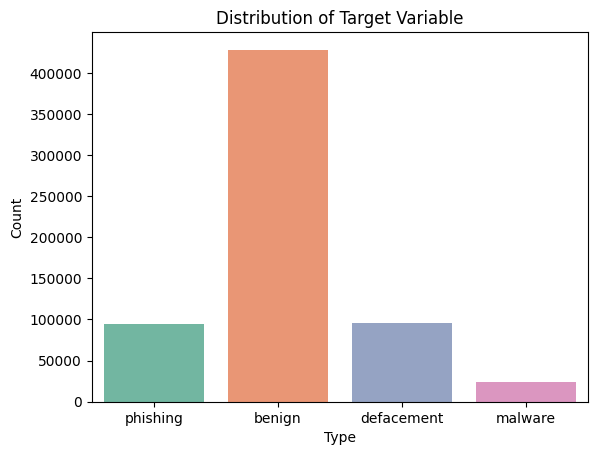

In [101]:
sns.countplot(data=df, x='type', palette='Set2', hue='type')
plt.title('Distribution of Target Variable')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## We don't need 4 categories

In [102]:
df["type"] = df["type"].replace({"benign": "safe", "defacement": "phishing", "malware": "phishing"})

In [103]:
df["type"].value_counts()

type
safe        428080
phishing    213045
Name: count, dtype: int64

In [104]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,safe
2,bopsecrets.org/rexroth/cr/1.htm,safe
3,http://www.garage-pirenne.be/index.php?option=...,phishing
4,http://adventure-nicaragua.net/index.php?optio...,phishing


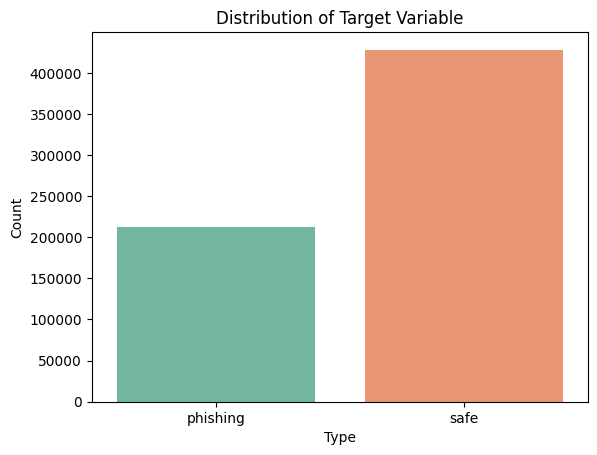

In [105]:
sns.countplot(data=df, x='type', palette='Set2', hue='type')
plt.title('Distribution of Target Variable')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Adding new data (phishing urls)

In [106]:
with open('../dataset/scam-urls.txt', 'r') as file:
    urls = file.readlines()

In [107]:
with open('../dataset/phishing_urls.csv', 'w', newline='') as csvfile:
    fieldnames = ['url', 'type']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for url in urls:
        writer.writerow({'url': url.strip(), 'type': 'phishing'})

In [108]:
# Hrre we append the phishing URLs to the original dataset
df = pd.concat([df, pd.read_csv('../dataset/phishing_urls.csv')])

In [110]:
df["type"].value_counts()

type
safe        428080
phishing    244777
Name: count, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672857 entries, 0 to 31731
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     672857 non-null  object
 1   type    672857 non-null  object
dtypes: object(2)
memory usage: 15.4+ MB


In [112]:
df.tail()

,url,type
31727,zuku-nfts.com,phishing
31728,zvideo-live.com,phishing
31729,zxcuzxytcatsrdrta.com,phishing
31730,zzb.bz,phishing
31731,zzzregsizzz.com.ru,phishing


In [113]:
df.to_csv("../dataset/clean_malicious_phish.csv")